# Thesis

### Connecting to yahoo finance and running basic statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
yf.download("AAPL")['Adj Close'].to_frame()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
1980-12-12,0.099584
1980-12-15,0.094388
1980-12-16,0.087461
1980-12-17,0.089625
1980-12-18,0.092224
...,...
2023-05-15,172.070007
2023-05-16,172.070007
2023-05-17,172.690002


In [3]:
class FinancialInstrument(): # Parent
    ''' Class to analyse Financial Instruments like stocks
    '''
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
    
    def get_data(self):
        ''' Import selected stocks data
        '''
        raw = yf.download(self._ticker, self.start, self.end)['Adj Close'].to_frame()
        raw.rename(columns = {"Adj Close": "Price"}, inplace = True)
        self.data = raw
    
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.Price/self.data.Price.shift(1))
        
    def plot_prices(self):
        ''' plots prices as time series ("ts")
        '''
        self.data.Price.plot(figsize = (12, 8))
        plt.title("Price Chart : {}". format(self._ticker), fontsize = 15)
        
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or as histogram("hist")
        '''
        if kind == 'ts':
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns : {}". format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns : {}". format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        ''' choose a different stock
        '''
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

In [4]:
class RiskReturn(FinancialInstrument): # child
    
    def __init__(self, ticker, start, end, freq = None):
        self.freq = freq
        super().__init__(ticker, start, end)
        
    def __repr__(self):
        return "RiskReturn(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
    
    def mean_return(self):
        ''' mean return based on selected frequency
        '''
        if self.freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.Price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
        
    def std_returns(self):
        ''' std deviation of returns based on selected frequency
        '''
        if self.freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.Price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
    
    def annualised_perf(self):
        ''' annualised return and risk
        '''
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [5]:
stock = RiskReturn("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [6]:
stock.freq

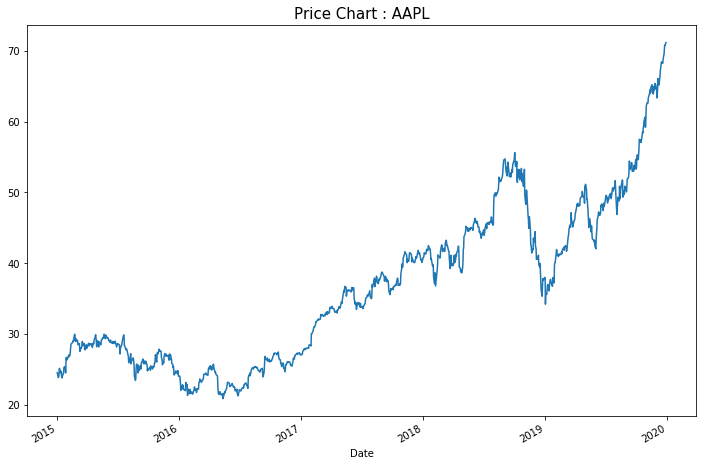

In [7]:
stock.plot_prices()

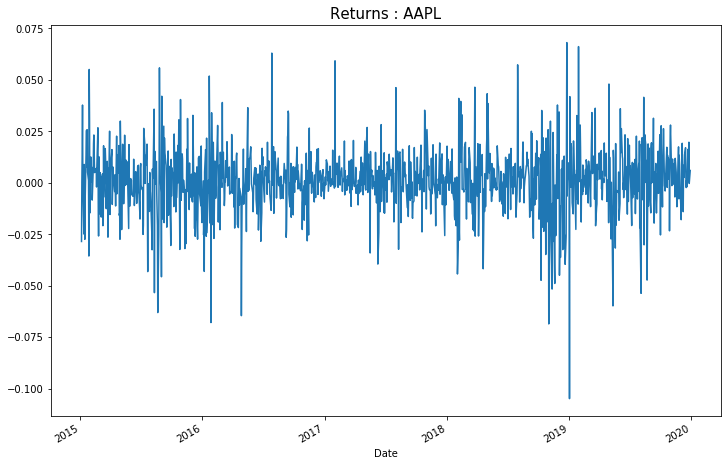

In [8]:
stock.plot_returns(kind = "ts")

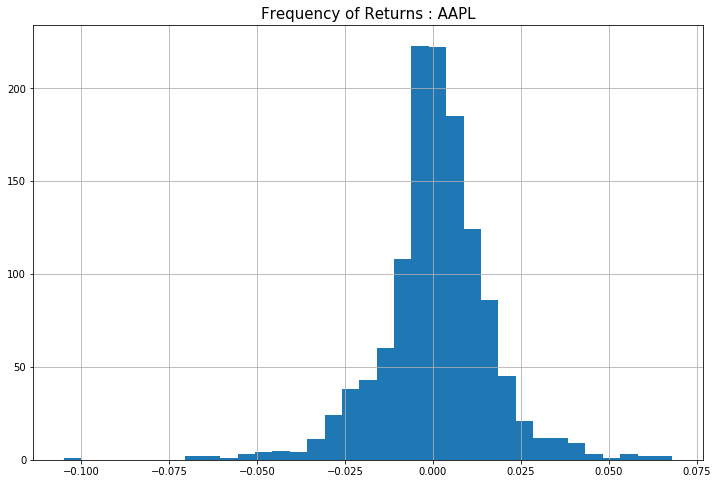

In [9]:
stock.plot_returns(kind = "hist")

In [10]:
stock.set_ticker(ticker = "GE")

[*********************100%***********************]  1 of 1 completed


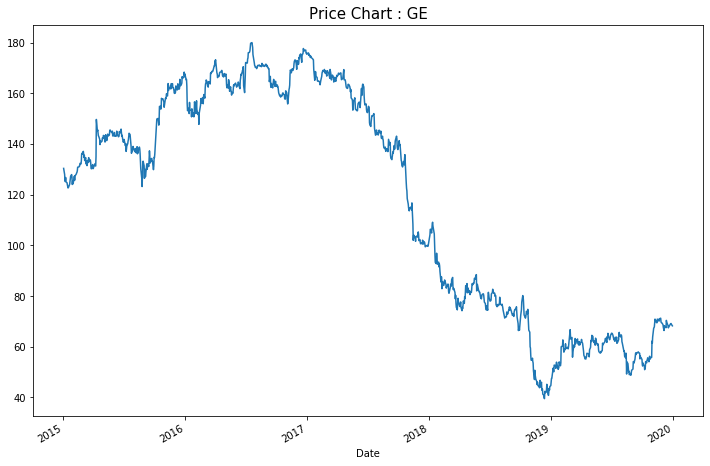

In [11]:
stock.plot_prices()

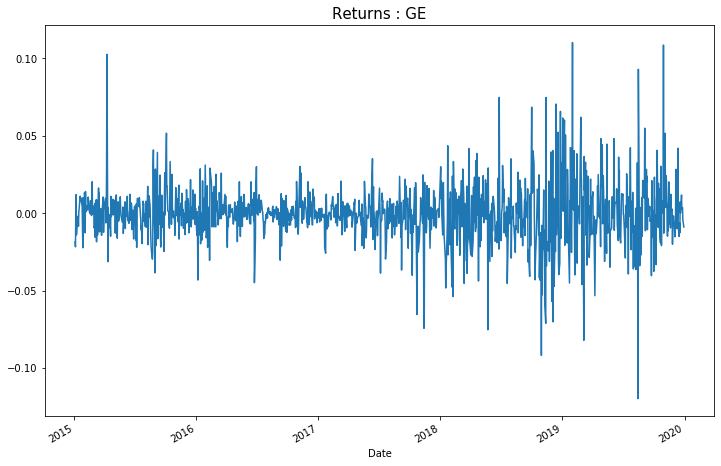

In [12]:
stock.plot_returns(kind = "ts")

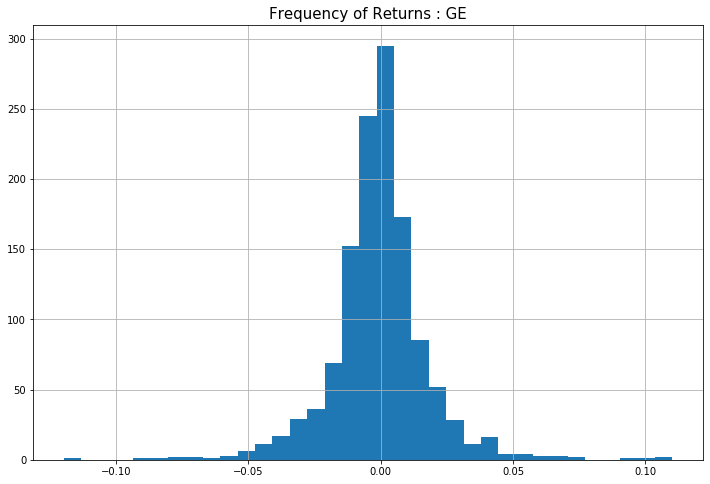

In [13]:
stock.plot_returns(kind = "hist")

In [14]:
stock.mean_return()

-0.0005151443142176024

In [15]:
stock.std_returns()

0.01875448230161453

In [16]:
stock.annualised_perf()

Return: -0.13 | Risk: 0.298


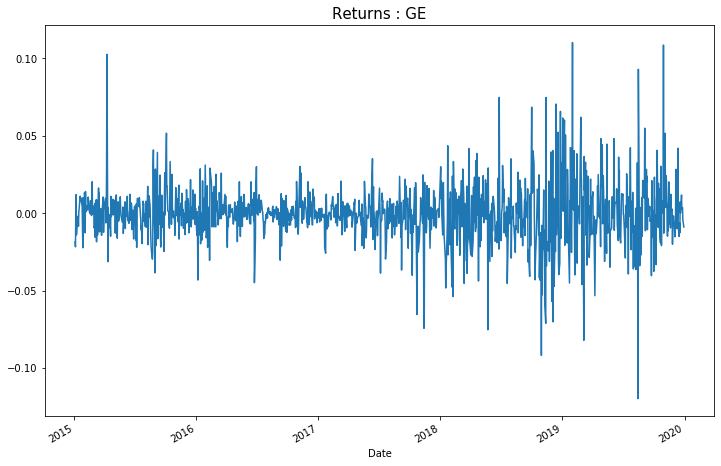

In [17]:
stock.plot_returns()

# Strategies

### Simple Moving Average

In [18]:
df = yf.download("EURUSD=X")["Adj Close"].to_frame()
df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2003-12-01,1.196501
2003-12-02,1.208897
2003-12-03,1.212298
2003-12-04,1.208094
2003-12-05,1.218695
...,...
2023-05-15,1.085270
2023-05-16,1.087370
2023-05-17,1.086567


In [19]:
sma_s = 50
sma_l = 200

In [20]:
df['SMA50'] = df['Adj Close'].rolling(sma_s).mean()
df['SMA200'] = df['Adj Close'].rolling(sma_l).mean()
df.dropna(inplace = True)

In [21]:
df

,Adj Close,SMA50,SMA200
Date,,,
2004-09-03,1.205502,1.222006,1.226859
2004-09-06,1.206593,1.221764,1.226909
2004-09-07,1.209907,1.221766,1.226914
2004-09-08,1.218903,1.221776,1.226947
2004-09-09,1.224200,1.221936,1.227028
...,...,...,...
2023-05-15,1.085270,1.087486,1.045495
2023-05-16,1.087370,1.087857,1.045833
2023-05-17,1.086567,1.088487,1.046162


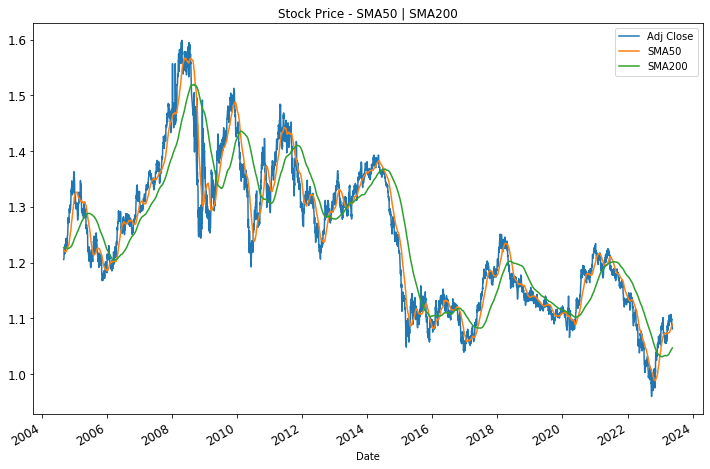

In [22]:
df.plot(figsize = (12,8), title = "Stock Price - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)

In [23]:
df["position"] = np.where(df["SMA50"] > df["SMA200"],1,-1)

In [24]:
df

,Adj Close,SMA50,SMA200,position
Date,,,,
2004-09-03,1.205502,1.222006,1.226859,-1
2004-09-06,1.206593,1.221764,1.226909,-1
2004-09-07,1.209907,1.221766,1.226914,-1
2004-09-08,1.218903,1.221776,1.226947,-1
2004-09-09,1.224200,1.221936,1.227028,-1
...,...,...,...,...
2023-05-15,1.085270,1.087486,1.045495,1
2023-05-16,1.087370,1.087857,1.045833,1
2023-05-17,1.086567,1.088487,1.046162,1


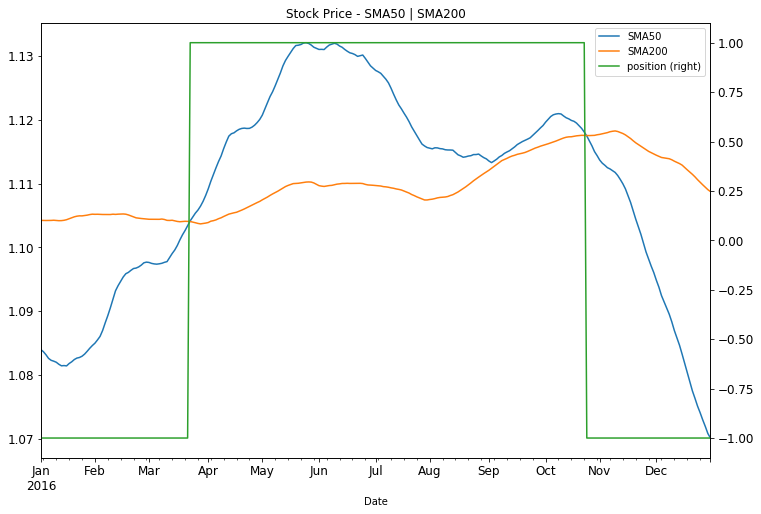

In [25]:
df.loc["2016", ["SMA50", "SMA200", "position"]].plot(figsize = (12,8), fontsize = 12, secondary_y = "position", title = "Stock Price - SMA{} | SMA{}".format(sma_s, sma_l))

## Vectorised strategy backtesting

In [26]:
df["log_returns"] = np.log(df["Adj Close"].div(df["Adj Close"].shift(1)))

In [27]:
df["strategy"] = df.position.shift(1) * df["log_returns"]

In [28]:
df.dropna(inplace = True)
df

,Adj Close,SMA50,SMA200,position,log_returns,strategy
Date,,,,,,
2004-09-06,1.206593,1.221764,1.226909,-1,0.000905,-0.000905
2004-09-07,1.209907,1.221766,1.226914,-1,0.002743,-0.002743
2004-09-08,1.218903,1.221776,1.226947,-1,0.007408,-0.007408
2004-09-09,1.224200,1.221936,1.227028,-1,0.004337,-0.004337
2004-09-10,1.227295,1.221860,1.227071,-1,0.002525,-0.002525
...,...,...,...,...,...,...
2023-05-15,1.085270,1.087486,1.045495,1,-0.005463,-0.005463
2023-05-16,1.087370,1.087857,1.045833,1,0.001934,0.001934
2023-05-17,1.086567,1.088487,1.046162,1,-0.000739,-0.000739


In [29]:
# absolute performance
df[["log_returns", "strategy"]].sum()

log_returns   -0.109151
strategy       0.365022
dtype: float64

In [30]:
# annual return
df[["log_returns", "strategy"]].sum().apply(np.exp)

log_returns    0.896595
strategy       1.440546
dtype: float64

In [31]:
# annual risk
df[["log_returns", "strategy"]].mean() *252

log_returns   -0.005670
strategy       0.018962
dtype: float64

In [32]:
df["creturns"] = df["log_returns"].cumsum().apply(np.exp)
df["cstrategy"] = df["strategy"].cumsum().apply(np.exp)
df

,Adj Close,SMA50,SMA200,position,log_returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-09-06,1.206593,1.221764,1.226909,-1,0.000905,-0.000905,1.000905,0.999096
2004-09-07,1.209907,1.221766,1.226914,-1,0.002743,-0.002743,1.003654,0.996359
2004-09-08,1.218903,1.221776,1.226947,-1,0.007408,-0.007408,1.011116,0.989006
2004-09-09,1.224200,1.221936,1.227028,-1,0.004337,-0.004337,1.015511,0.984726
2004-09-10,1.227295,1.221860,1.227071,-1,0.002525,-0.002525,1.018078,0.982243
...,...,...,...,...,...,...,...,...
2023-05-15,1.085270,1.087486,1.045495,1,-0.005463,-0.005463,0.900264,1.446440
2023-05-16,1.087370,1.087857,1.045833,1,0.001934,0.001934,0.902006,1.449239
2023-05-17,1.086567,1.088487,1.046162,1,-0.000739,-0.000739,0.901340,1.448169


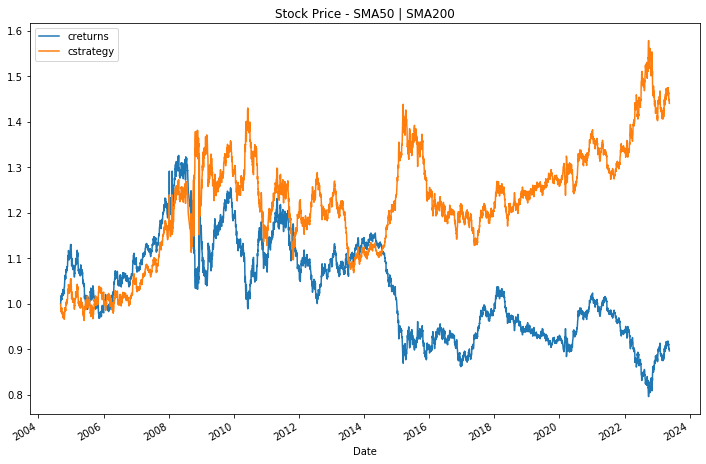

In [33]:
df[["creturns", "cstrategy"]].plot(figsize = (12,8), title = "Stock Price - SMA{} | SMA{}".format(sma_s, sma_l)) 

In [34]:
outperformance = df.cstrategy.iloc[-1] - df.creturns.iloc[-1]
outperformance

0.5439505938621206

## Finding the optimal SMA Strategy

In [35]:
#combining previous steps into a algorithm
def test_strategy(SMA):
    data = df.copy()
    data["log_returns"] = np.log(data["Adj Close"].div(data["Adj Close"].shift(1)))
    data['SMA_S'] = data['Adj Close'].rolling(SMA[0]).mean()
    data['SMA_L'] = data['Adj Close'].rolling(SMA[1]).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"],1,-1)
    data["strategy"] = data.position.shift(1) * data["log_returns"]
    data.dropna(inplace = True)
    
    return np.exp(data["strategy"].sum())

In [36]:
# 252 for number of days
SMA_S_range = range(10,50, 1)
SMA_L_range = range(100, 252, 1)

In [37]:
from itertools import product
possibilities = list(product(SMA_S_range, SMA_L_range))
results = []
for p in possibilities:
    results.append(test_strategy(p))

In [38]:
results

[1.1746604454850758,
 1.151728930851645,
 1.1444457909155117,
 1.1670383464637524,
 1.2459337076469843,
 1.2363531406392134,
 1.2786458119727404,
 1.326082111391585,
 1.3092343885915156,
 1.4395434233881916,
 1.4809225674524094,
 1.413932888067975,
 1.4874604369649065,
 1.450042326455875,
 1.339798720886977,
 1.3902349680748494,
 1.4721215292862722,
 1.479361535582005,
 1.5030655749699835,
 1.5566322612521772,
 1.6164519397789363,
 1.4911146150126644,
 1.5498747197680647,
 1.4950932950005351,
 1.500854394200082,
 1.4722957117439093,
 1.523756752469566,
 1.628402201172345,
 1.6676722224673368,
 1.6043345584532023,
 1.632800787750767,
 1.6205438464724553,
 1.6403746416299736,
 1.648339565676711,
 1.7024569941265428,
 1.6609520316387887,
 1.7135587392397928,
 1.7126242528547944,
 1.713363704931778,
 1.6221569941511265,
 1.6371281052924618,
 1.6929088007956972,
 1.6517509932845533,
 1.6257919190638208,
 1.5350205185972217,
 1.5173403081064636,
 1.5359772252504476,
 1.583667800139796,
 1.58

In [39]:
np.max(results)

2.615121144656507

In [40]:
# to find the optimised value
possibilities[np.argmax(results)]

(31, 153)

In [41]:
ordered = pd.DataFrame(data = possibilities, columns = ["SMA_S", "SMA_L"])
ordered["performance"] = results
ordered.nlargest(10, "performance")

,SMA_S,SMA_L,performance
3245,31,153,2.615121
2797,28,161,2.607692
5509,46,137,2.587604
5660,47,136,2.583715
3094,30,154,2.580034
2798,28,162,2.578910
3246,31,154,2.577604
5356,45,136,2.574854
2948,29,160,2.570114
2950,29,162,2.556837


## Backtesting with Optimised SMA

In [42]:
sma_s2 = 31
sma_l2 = 153

In [43]:
df1 = yf.download("EURUSD=X")["Adj Close"].to_frame()
df1['SMA31'] = df1['Adj Close'].rolling(sma_s2).mean()
df1['SMA153'] = df1['Adj Close'].rolling(sma_l2).mean()
df1.dropna(inplace = True)
df1

[*********************100%***********************]  1 of 1 completed


,Adj Close,SMA31,SMA153
Date,,,
2004-06-30,1.218398,1.213527,1.228225
2004-07-01,1.216205,1.214037,1.228353
2004-07-02,1.231103,1.215179,1.228499
2004-07-05,1.229997,1.216056,1.228614
2004-07-06,1.228501,1.216978,1.228748
...,...,...,...
2023-05-15,1.085270,1.096727,1.060612
2023-05-16,1.087370,1.096954,1.061374
2023-05-17,1.086567,1.096804,1.062103


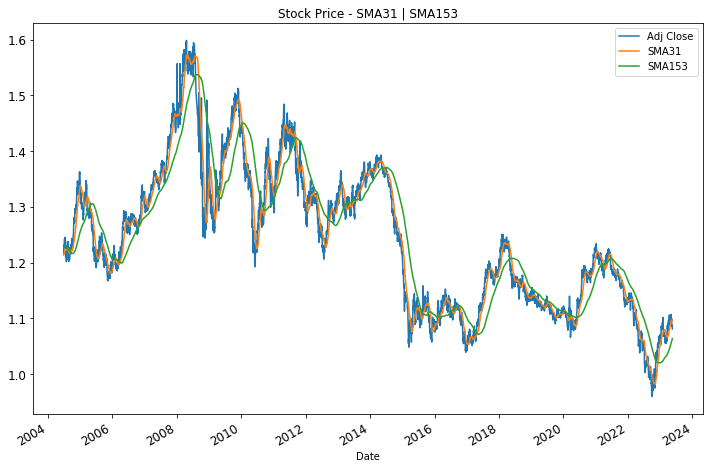

In [44]:
df1.plot(figsize = (12,8), title = "Stock Price - SMA{} | SMA{}".format(sma_s2, sma_l2), fontsize = 12)

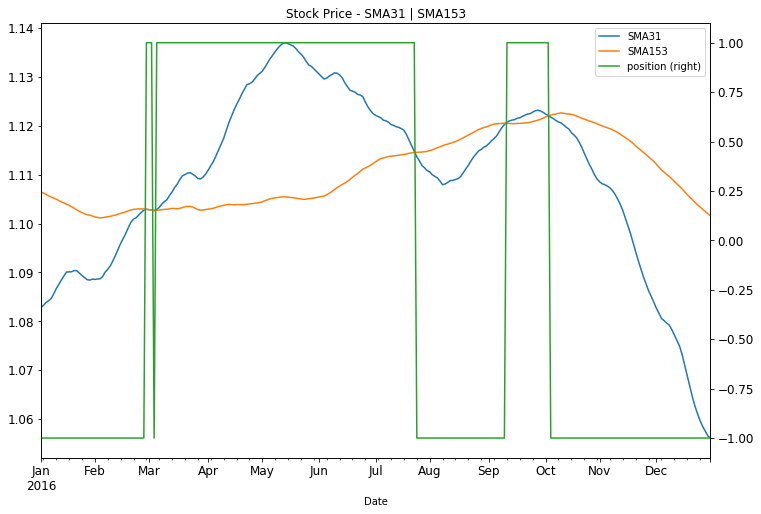

In [45]:
df1["position"] = np.where(df1["SMA31"] > df1["SMA153"],1,-1)
df1.loc["2016", ["SMA31", "SMA153", "position"]].plot(figsize = (12,8), fontsize = 12, secondary_y = "position", title = "Stock Price - SMA{} | SMA{}".format(sma_s2, sma_l2))

In [46]:
df1["log_returns"] = np.log(df1["Adj Close"].div(df1["Adj Close"].shift(1)))
df1["strategy"] = df1.position.shift(1) * df1["log_returns"]
df1.dropna(inplace = True)
df1

,Adj Close,SMA31,SMA153,position,log_returns,strategy
Date,,,,,,
2004-07-01,1.216205,1.214037,1.228353,-1,-0.001802,0.001802
2004-07-02,1.231103,1.215179,1.228499,-1,0.012175,-0.012175
2004-07-05,1.229997,1.216056,1.228614,-1,-0.000898,0.000898
2004-07-06,1.228501,1.216978,1.228748,-1,-0.001217,0.001217
2004-07-07,1.237103,1.217850,1.228868,-1,0.006978,-0.006978
...,...,...,...,...,...,...
2023-05-15,1.085270,1.096727,1.060612,1,-0.005463,-0.005463
2023-05-16,1.087370,1.096954,1.061374,1,0.001934,0.001934
2023-05-17,1.086567,1.096804,1.062103,1,-0.000739,-0.000739


In [47]:
# absolute performance
df1[["log_returns", "strategy"]].sum()

log_returns   -0.119791
strategy       0.956757
dtype: float64

In [48]:
# annual return
df1[["log_returns", "strategy"]].sum().apply(np.exp)

log_returns    0.887105
strategy       2.603240
dtype: float64

In [49]:
# annual risk
df1[["log_returns", "strategy"]].mean() *252

log_returns   -0.006163
strategy       0.049225
dtype: float64

In [50]:
df1["creturns"] = df1["log_returns"].cumsum().apply(np.exp)
df1["cstrategy"] = df1["strategy"].cumsum().apply(np.exp)
df1

,Adj Close,SMA31,SMA153,position,log_returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-07-01,1.216205,1.214037,1.228353,-1,-0.001802,0.001802,0.998200,1.001803
2004-07-02,1.231103,1.215179,1.228499,-1,0.012175,-0.012175,1.010427,0.989680
2004-07-05,1.229997,1.216056,1.228614,-1,-0.000898,0.000898,1.009520,0.990570
2004-07-06,1.228501,1.216978,1.228748,-1,-0.001217,0.001217,1.008292,0.991776
2004-07-07,1.237103,1.217850,1.228868,-1,0.006978,-0.006978,1.015352,0.984880
...,...,...,...,...,...,...,...,...
2023-05-15,1.085270,1.096727,1.060612,1,-0.005463,-0.005463,0.890735,2.613891
2023-05-16,1.087370,1.096954,1.061374,1,0.001934,0.001934,0.892459,2.618950
2023-05-17,1.086567,1.096804,1.062103,1,-0.000739,-0.000739,0.891800,2.617015


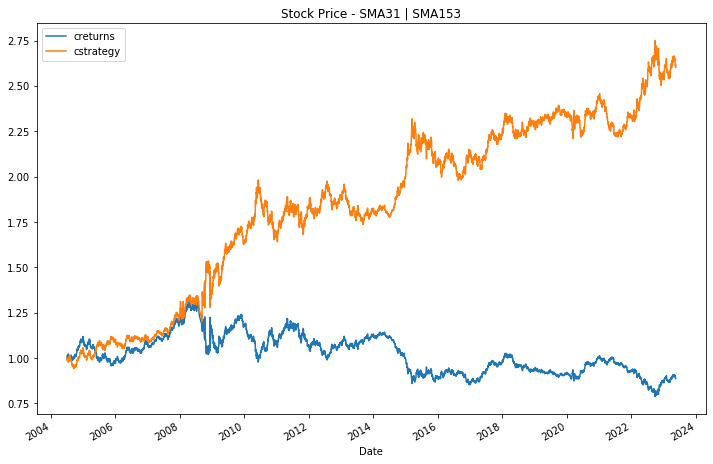

In [51]:
df1[["creturns", "cstrategy"]].plot(figsize = (12,8), title = "Stock Price - SMA{} | SMA{}".format(sma_s2, sma_l2)) 

## Turning this SMA strategy into a class

In [52]:
# Load all possible Currency Pairs into a table
DataTable = pd.DataFrame()
Currency_pairs = ["EURUSD=X", "JPY=X", "GBPUSD=X", "AUDUSD=X", "NZDUSD=X", "EURJPY=X", "GBPJPY=X", "EURGBP=X", "EURCAD=X", "EURSEK=X", "EURCHF=X",
                 "EURHUF=X", "EURJPY=X", "CNY=X", "HKD=X", "SGD=X", "INR=X", "MXN=X", "PHP=X", "IDR=X", "THB=X", "MYR=X", "ZAR=X", "RUB=X"]
for i in Currency_pairs:
    DataTable[i] = yf.download(i)["Adj Close"].to_frame()
DataTable

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,EURUSD=X,JPY=X,GBPUSD=X,AUDUSD=X,NZDUSD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURCAD=X,EURSEK=X,...,HKD=X,SGD=X,INR=X,MXN=X,PHP=X,IDR=X,THB=X,MYR=X,ZAR=X,RUB=X
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-01,1.196501,109.169998,1.718597,NaN,0.644288,130.580002,187.630005,0.69570,1.55960,9.01500,...,7.76500,1.72170,45.709999,11.358000,55.470001,8498.400391,39.889999,3.7968,6.342300,29.700001
2003-12-02,1.208897,108.730003,1.730313,NaN,0.646204,131.440002,188.009995,0.69800,1.56700,9.00780,...,7.75940,1.72000,45.629002,11.290000,55.470001,8486.099609,39.848999,3.7971,6.295100,29.690001
2003-12-03,1.212298,108.300003,1.728101,NaN,0.649519,131.259995,187.089996,0.70070,1.57590,8.97200,...,7.76040,1.71610,45.549999,11.245000,55.470001,8467.900391,39.806999,3.7902,6.192400,29.690001
2003-12-04,1.208094,108.269997,1.720697,NaN,0.645911,130.759995,186.220001,0.70180,1.58290,8.96100,...,7.76630,1.71350,45.548000,11.188000,55.020000,8492.500000,39.869999,3.7987,6.335100,29.680000
2003-12-05,1.218695,107.620003,1.733102,NaN,0.645120,130.729996,185.880005,0.70300,1.58760,8.94310,...,7.75970,1.71400,45.449001,11.197000,55.250000,8469.099609,39.813000,3.7896,6.220100,29.620001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-15,1.085270,135.822006,1.245097,0.664690,0.619559,147.395004,169.098007,0.87158,1.47070,11.27056,...,7.84240,1.33861,82.200302,17.596251,55.854000,14743.000000,33.880001,4.4765,19.155800,77.324997
2023-05-16,1.087370,136.044998,1.252521,0.670300,0.624329,147.923004,170.380005,0.86800,1.46414,11.24877,...,7.83832,1.33621,82.266701,17.433100,56.068001,14795.000000,33.759998,4.4950,18.996901,79.714996
2023-05-17,1.086567,136.429993,1.248439,0.665779,0.623741,148.229004,170.304001,0.87024,1.46429,11.30870,...,7.83830,1.33980,82.295998,17.480301,56.182999,14885.000000,34.078999,4.4920,19.049601,80.455002


In [53]:
class SMABacktester():
    ''' Class for the vectorized backtesting of SMA-based trading strategies.
    '''
    
    def __init__(self, symbol, SMA_s, SMA_l, start, end):
        '''
        Parameters
        ----------
        symbol: str
            ticker symbol (instrument) to be backtested
        SMA_S: int
            moving window in bars (e.g. days) for shorter SMA
        SMA_L: int
            moving window in bars (e.g. days) for longer SMA
        start: str
            start date for data import
        end: str
            end date for data import
        '''
        self.symbol = symbol
        self.SMA_s = SMA_s
        self.SMA_l = SMA_l
        self.start = start
        self.end = end
        self.results = None 
        self.get_data()
        self.prepare_data()
        
    def __repr__(self):
        return "SMABacktester(symbol = {}, SMA_S = {}, SMA_L = {}, start = {}, end = {})".format(self.symbol, self.SMA_s, self.SMA_l, self.start, self.end)
        
    def get_data(self):
        ''' Imports the data from forex_pairs.csv (source can be changed).
        '''
        raw = DataTable
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["log_returns"] = np.log(raw / raw.shift(1))
        self.data = raw
        
    def prepare_data(self):
        '''Prepares the data for strategy backtesting (strategy-specific).
        '''
        data = self.data.copy()
        data["SMA_s"] = data["price"].rolling(self.SMA_s).mean()
        data["SMA_l"] = data["price"].rolling(self.SMA_l).mean()
        self.data = data
        
    def set_parameters(self, SMA_s = None, SMA_l = None):
        ''' Updates SMA parameters and the prepared dataset.
        '''
        if SMA_s is not None:
            self.SMA_s = SMA_s
            self.data["SMA_s"] = self.data["price"].rolling(self.SMA_s).mean()
        if SMA_l is not None:
            self.SMA_l = SMA_l
            self.data["SMA_l"] = self.data["price"].rolling(self.SMA_l).mean()
            
    def test_strategy(self):
        ''' Backtests the SMA-based trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_s"] > data["SMA_l"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["log_returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["log_returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
       
        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the performance of the trading strategy and compares to "buy and hold".
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | SMA_s = {} | SMA_l = {}".format(self.symbol, self.SMA_s, self.SMA_l)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
    
    def optimize_parameters(self, SMA_s_range, SMA_l_range):
        ''' Finds the optimal strategy (global maximum) given the SMA parameter ranges.

        Parameters
        ----------
        SMA_S_range, SMA_L_range: tuple
            tuples of the form (start, end, step size)
        '''
        
        combinations = list(product(range(*SMA_s_range), range(*SMA_l_range)))
        
        # test all combinations
        results = []
        for comb in combinations:
            self.set_parameters(comb[0], comb[1])
            results.append(self.test_strategy()[0])
        
        best_perf = np.max(results) # best performance
        opt = combinations[np.argmax(results)] # optimal parameters
        
        # run/set the optimal strategy
        self.set_parameters(opt[0], opt[1])
        self.test_strategy()
                   
        # create a df with many results
        many_results =  pd.DataFrame(data = combinations, columns = ["SMA_s", "SMA_s"])
        many_results["performance"] = results
        self.results_overview = many_results
                            
        return opt, best_perf

In [54]:
#252 for number of trading days in a year
tester = SMABacktester("EURUSD=X", 50, 252, "2004-01-01", "2020-06-30")

In [55]:
#run test given selected inputs
tester.test_strategy()

(1.187862, 0.348023)

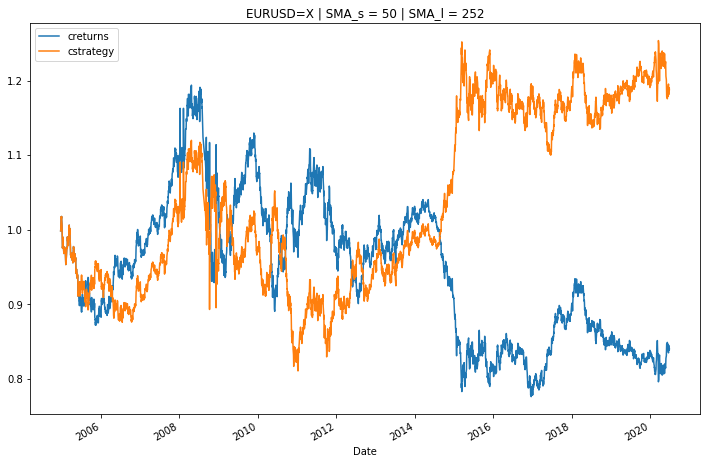

In [56]:
tester.plot_results()

In [57]:
tester.results

,price,log_returns,SMA_s,SMA_l,position,strategy,creturns,cstrategy
Date,,,,,,,,
2004-12-21,1.336898,-0.001726,1.299392,1.240735,1,-0.001726,0.998275,0.998275
2004-12-22,1.339100,0.001646,1.301532,1.241056,1,0.001646,0.999920,0.999920
2004-12-23,1.351205,0.008999,1.303858,1.241383,1,0.008999,1.008958,1.008958
2004-12-24,1.353803,0.001921,1.306157,1.241707,1,0.001921,1.010898,1.010898
2004-12-27,1.362398,0.006329,1.308447,1.242098,1,0.006329,1.017316,1.017316
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.101794,1.105392,-1,-0.002892,0.844704,1.181022
2020-06-25,1.125087,-0.005449,1.102486,1.105406,-1,0.005449,0.840114,1.187475
2020-06-26,1.122208,-0.002562,1.103213,1.105411,-1,0.002562,0.837964,1.190521


In [58]:
#find optimal from the range supplied
tester.optimize_parameters((10, 50, 1), (100, 252, 1))

((46, 137), 2.526694)

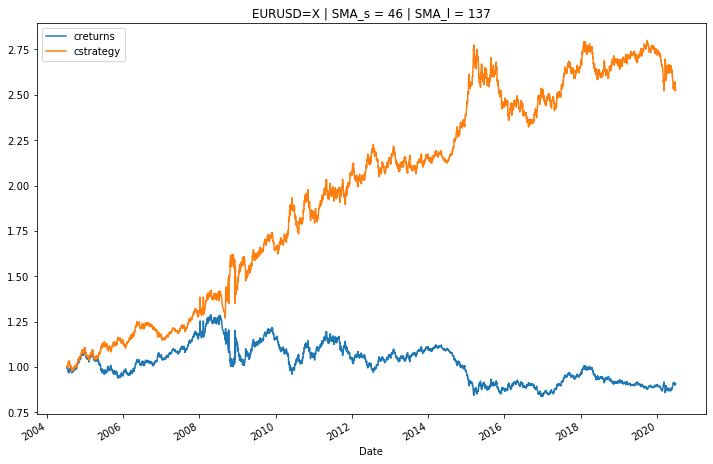

In [59]:
tester.plot_results()

In [60]:
tester.results_overview.nlargest(10, "performance")

,SMA_s,SMA_s,performance
5509,46,137,2.526694
5660,47,136,2.513588
5356,45,136,2.490511
5507,46,135,2.464982
4283,38,127,2.455225
5963,49,135,2.447218
5661,47,137,2.439993
5811,48,135,2.439185
5508,46,136,2.432296
4284,38,128,2.427431
